<a href="https://colab.research.google.com/github/hang-1n-there/pytorch_learn/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


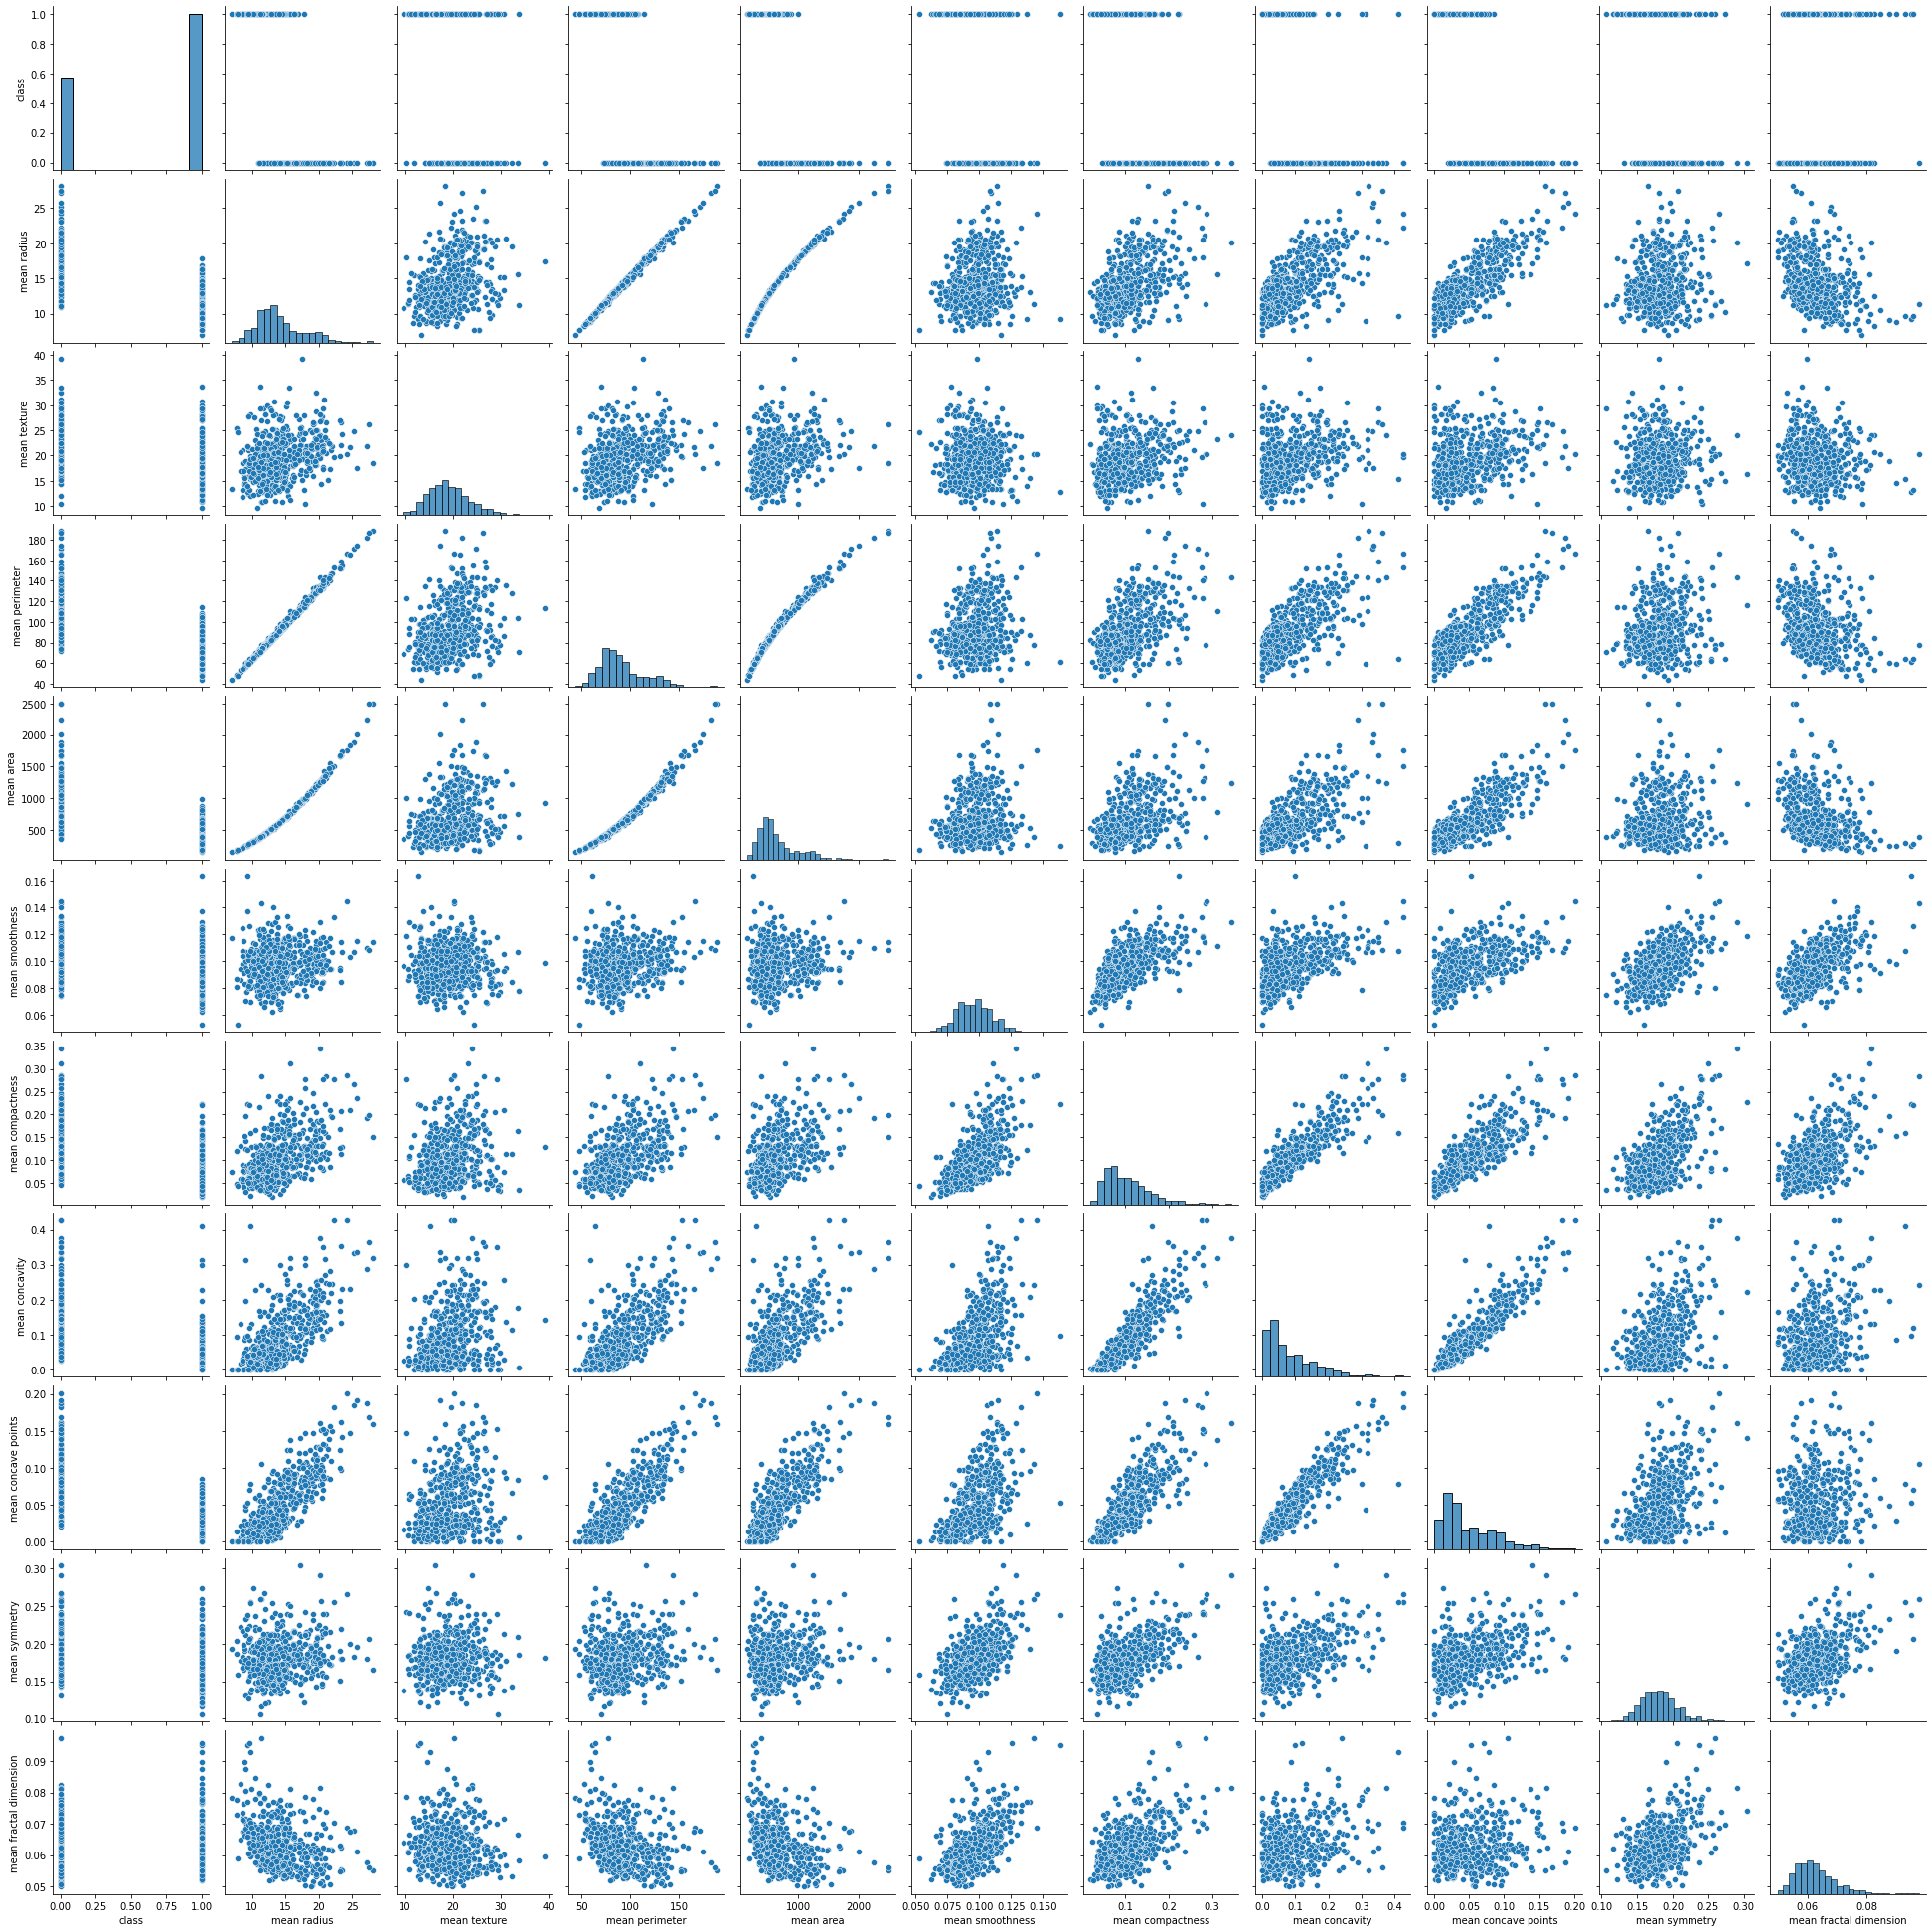

In [ ]:
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

In [ ]:
cols = ["mean radius", "mean texture" , "mean smoothness" , "mean compactness" , "mean concave points" ,
        "worst radius", "worst texture" , "worst smoothness" , "worst compactness" , "worst concave points" ,"class"]

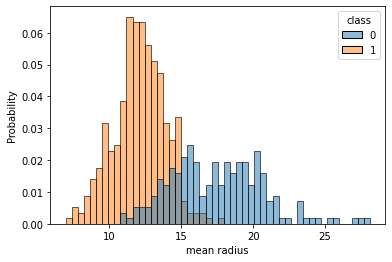

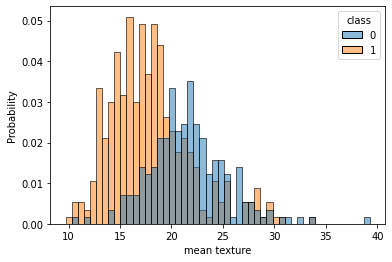

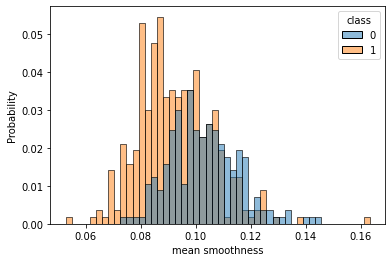

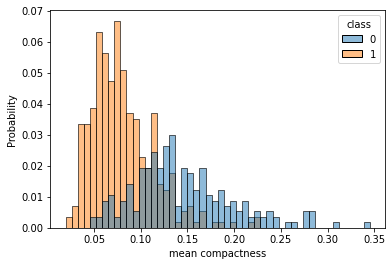

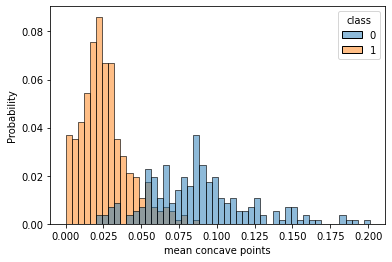

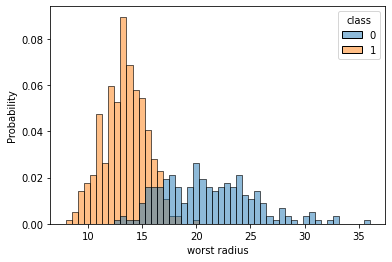

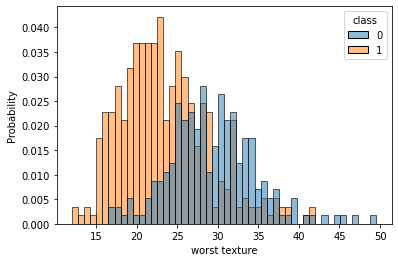

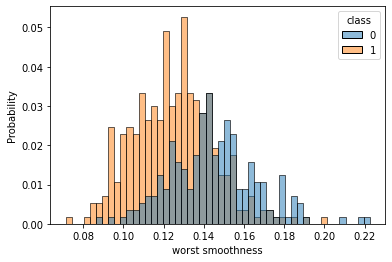

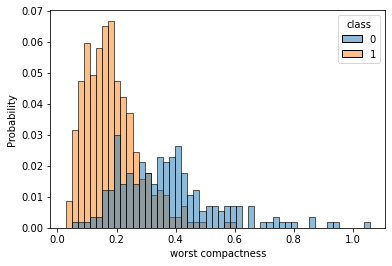

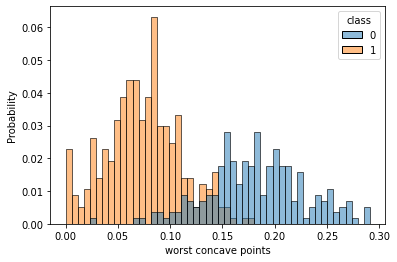

In [ ]:
for c in cols[:-1]:
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

In [ ]:
x = data[:,:-1]
y = data[:,-1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [ ]:
n_epochs = 200000
print_epochs = 10000
learning_rate = 1e-2

In [ ]:
class Mymodel(nn.Module):
  def __init__(self, input_dim, output_dim):
    self.input_dim=input_dim
    self.output_dim=output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim,output_dim)
    self.act = nn.Sigmoid()

  def forward(self,x):
    # |x| = batch_size * input_dim
    y = self.act(self.linear(x))
    # |y| = batch_size * output_dim

    return y

In [ ]:
model = Mymodel(input_dim = x.size(-1),output_dim = y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for i in range(n_epochs):
  y_hat = model.forward(x)
  loss = crit(y_hat,y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_epochs == 0:
    print("Epoch : {:d}/{}, Loss : {:.4e}".format(i+1,n_epochs,loss))

Epoch : 10000/200000, Loss : 2.7440e-01
Epoch : 20000/200000, Loss : 2.2692e-01
Epoch : 30000/200000, Loss : 1.9848e-01
Epoch : 40000/200000, Loss : 1.7986e-01
Epoch : 50000/200000, Loss : 1.6682e-01
Epoch : 60000/200000, Loss : 1.5719e-01
Epoch : 70000/200000, Loss : 1.4980e-01
Epoch : 80000/200000, Loss : 1.4395e-01
Epoch : 90000/200000, Loss : 1.3919e-01
Epoch : 100000/200000, Loss : 1.3524e-01
Epoch : 110000/200000, Loss : 1.3191e-01
Epoch : 120000/200000, Loss : 1.2905e-01
Epoch : 130000/200000, Loss : 1.2658e-01
Epoch : 140000/200000, Loss : 1.2442e-01
Epoch : 150000/200000, Loss : 1.2251e-01
Epoch : 160000/200000, Loss : 1.2081e-01
Epoch : 170000/200000, Loss : 1.1928e-01
Epoch : 180000/200000, Loss : 1.1791e-01
Epoch : 190000/200000, Loss : 1.1666e-01
Epoch : 200000/200000, Loss : 1.1551e-01


In [ ]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print("Accuarcy : {:.4f}".format(correct_cnt/total_cnt))

Accuarcy : 0.9666


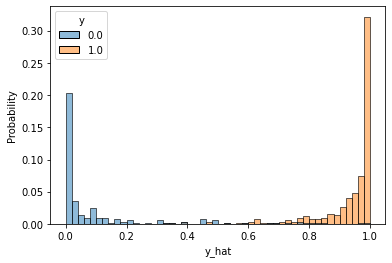

In [ ]:
df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(), columns = ['y','y_hat'])

sns.histplot(df,x='y_hat',hue='y',bins=50,stat='probability')
plt.show()